# Human Factors Prediction Model (LSTM => NTSB)

## Import Notebook

In [9]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

In [ ]:
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
# ntsb_df.sort_values(by='date', ascending=False, inplace=True)
# ntsb_df = ntsb_df.sample(n=1000, random_state=42)
dfs = { 'ntsb': ntsb_df }

ls_version = 1

## NTSB + LS(Asrs)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (5677, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


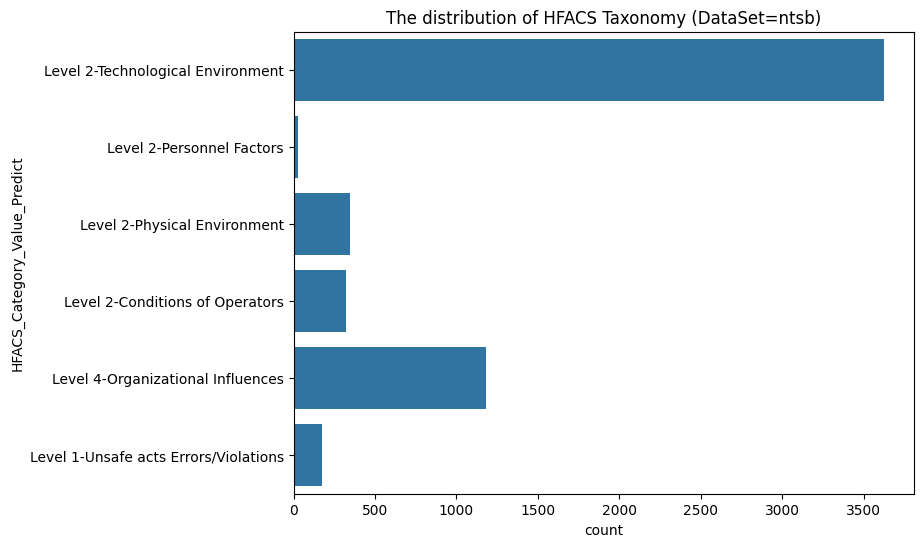

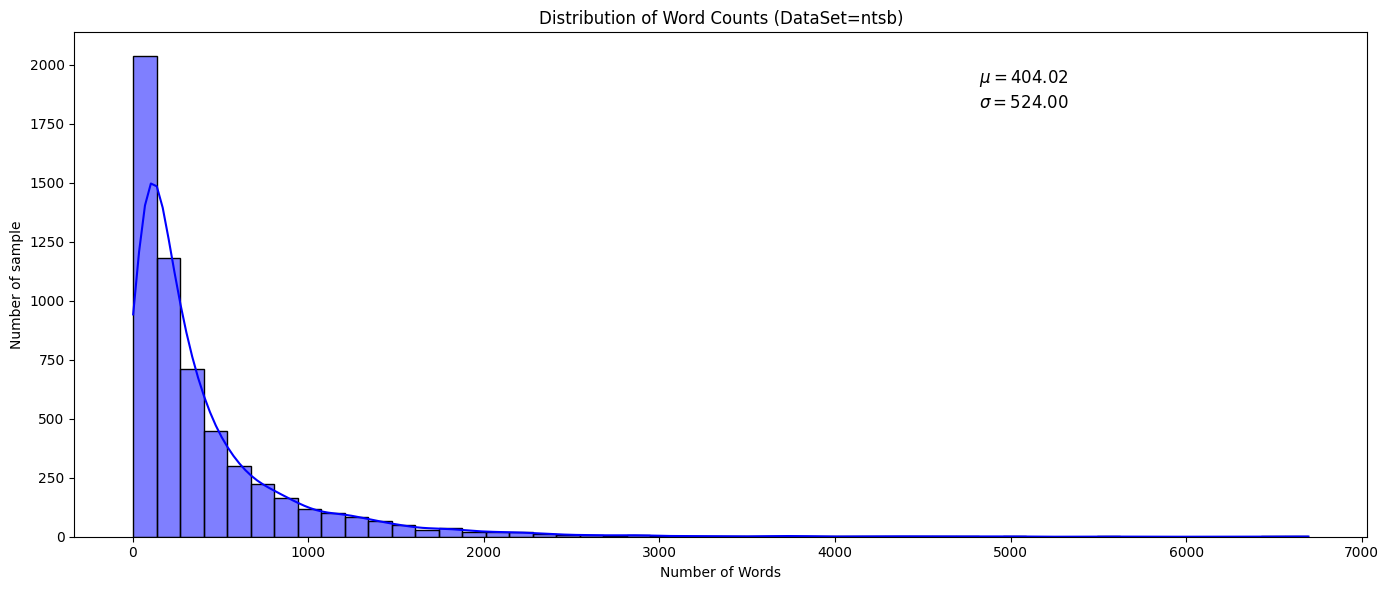

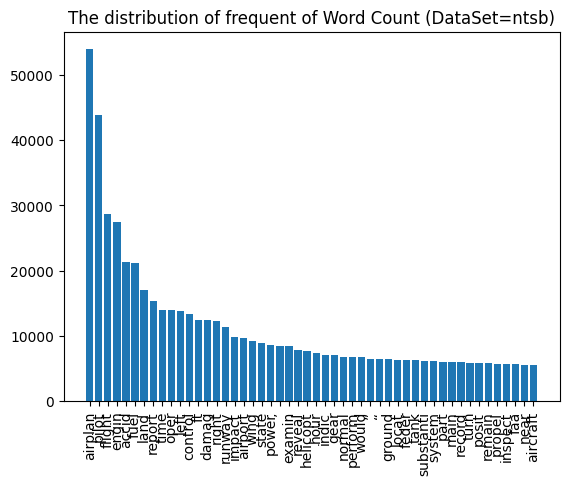

Total unique words: 59890
Define Y
Shape of label tensor: (5677,)
Define X
Found 59891 unique tokens.
Shape of data tensor: (5677, 200)
(4541, 200) (4541,)
(1136, 200) (1136,)
4    722
5    246
3     68
1     61
0     32
2      7
Name: count, dtype: int64
4    2902
5     938
3     279
1     259
0     140
2      23
Name: count, dtype: int64
Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.5536 - loss: 1.6771 - val_accuracy: 0.5912 - val_loss: 1.1892
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.6409 - loss: 1.0865 - val_accuracy: 0.5912 - val_loss: 1.1832
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - accuracy: 0.6506 - loss: 1.0568 - val_accuracy: 0.5912 - val_loss: 1.1670
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 24s 187ms/step - accuracy: 0.6528 - loss: 1.0347 - val_accuracy: 0.5934 - val_loss: 1.1485
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 24s 187ms/step - accuracy: 0.6535 - loss: 1.0288 - val_accuracy: 0.5890 - val_loss: 1.1496
Epo

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

178/178 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step


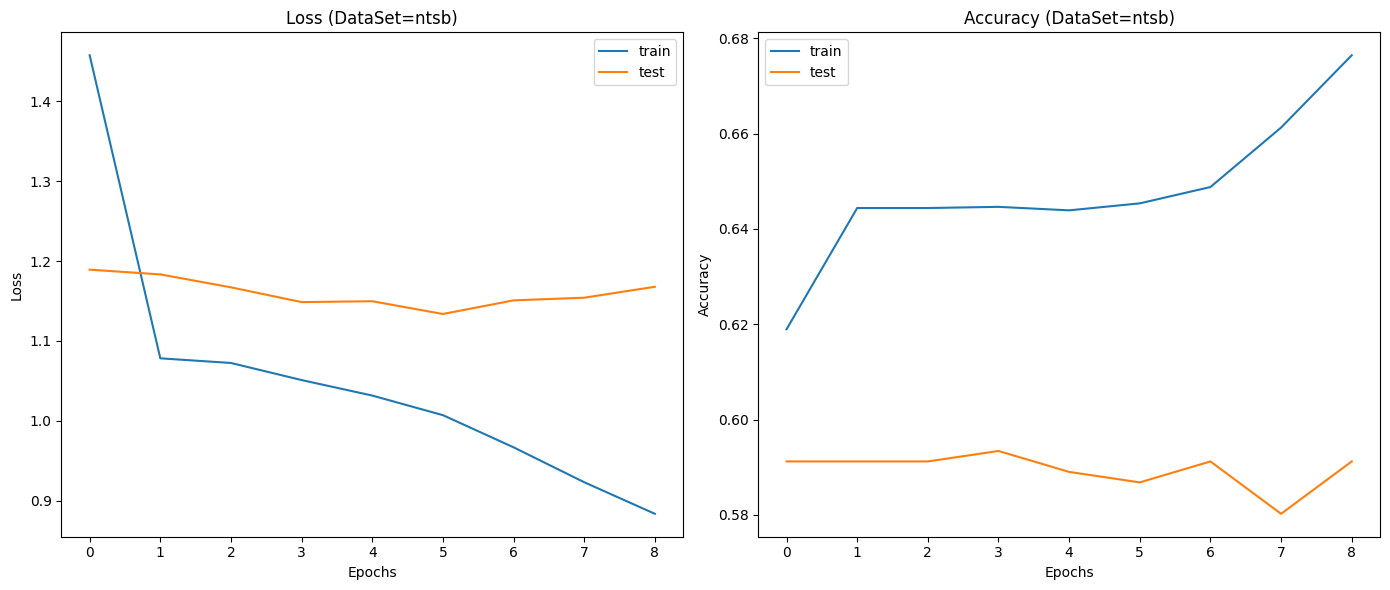

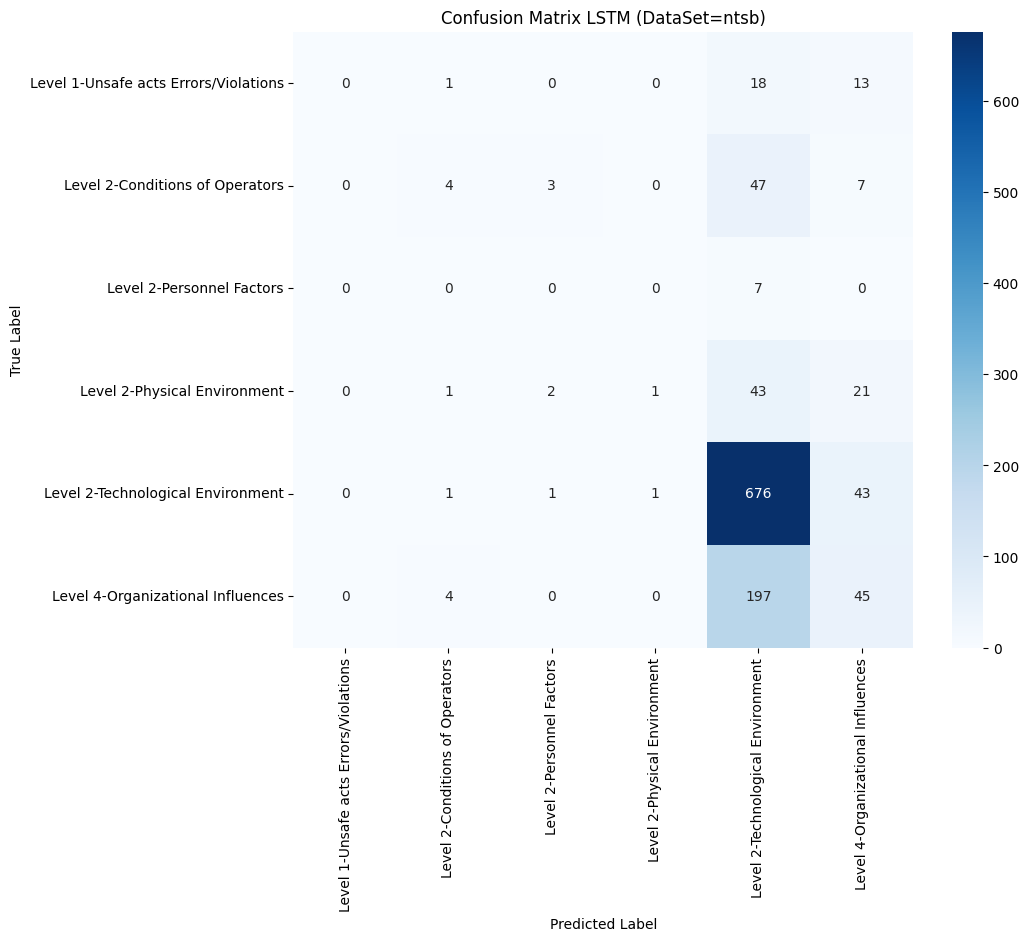

In [11]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'asrs',
    "ls_version": ls_version
}

# 04. Train Model
lstm_ls_asrs_Model = LSTMModel(dfs, ds_name='ntsb', options=options)
lstm_ls_asrs_Model.train()

# 03. Evaluate Model
ntsb_evaluate_result = lstm_ls_asrs_Model.evaluate()

## NTSB + LS(Ntsb)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


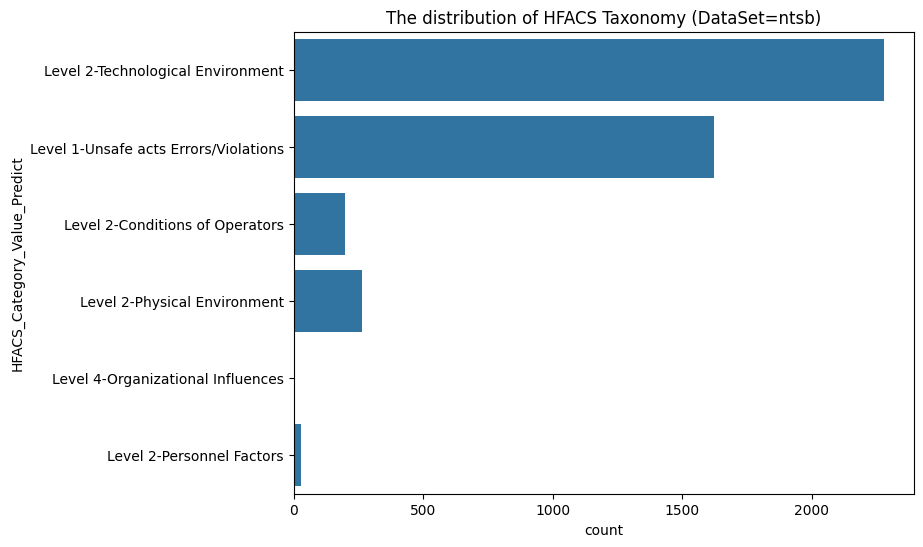

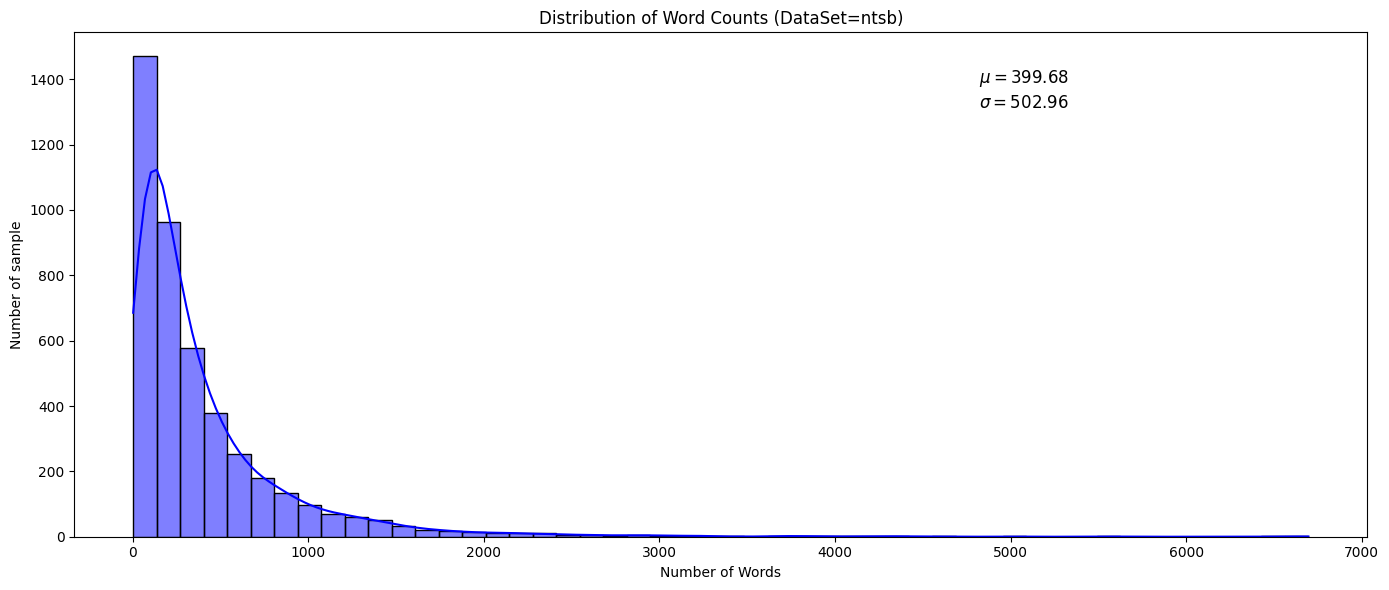

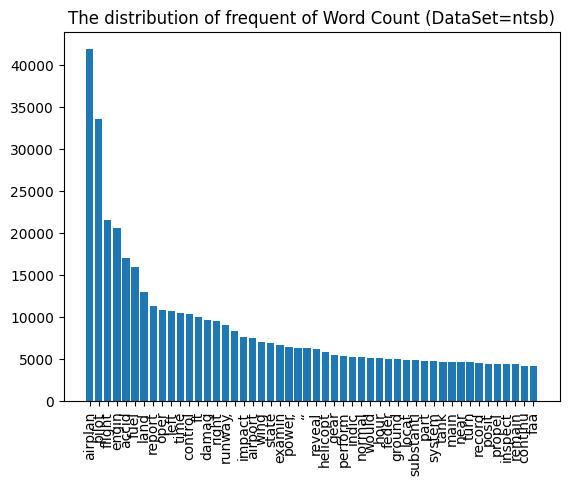

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
4    476
0    303
3     51
1     44
2      5
Name: count, dtype: int64
4    1802
0    1319
3     215
1     154
2      23
5       3
Name: count, dtype: int64
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.4153 - loss: 1.7386 - val_accuracy: 0.5028 - val_loss: 1.0959
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.4949 - loss: 1.1269 - val_accuracy: 0.5028 - val_loss: 1.0548
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.5023 - loss: 1.0852 - val_accuracy: 0.5028 - val_loss: 1.0528
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.5133 - loss: 1.0700 - val_accuracy: 0.5028 - val_loss: 1.0477
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.4945 - loss: 1.0792 - val_accuracy: 0.5028 - val_loss: 1.0471
Epoch 6/10
99/99 ━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_class

138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step


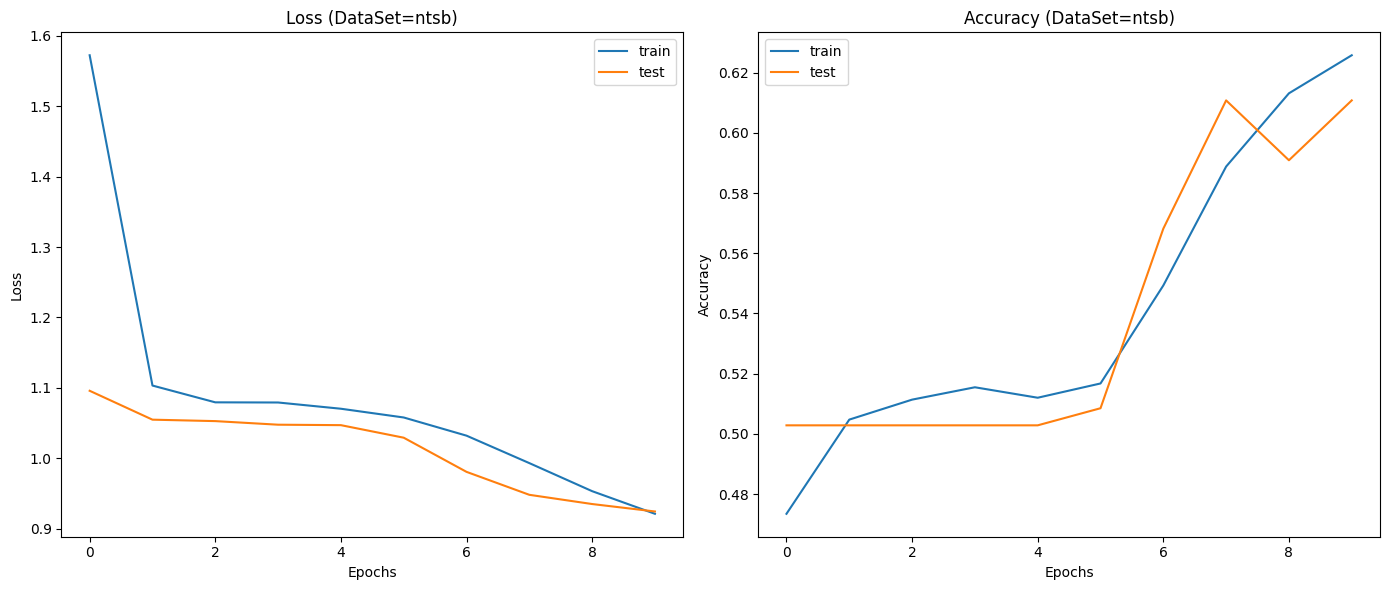

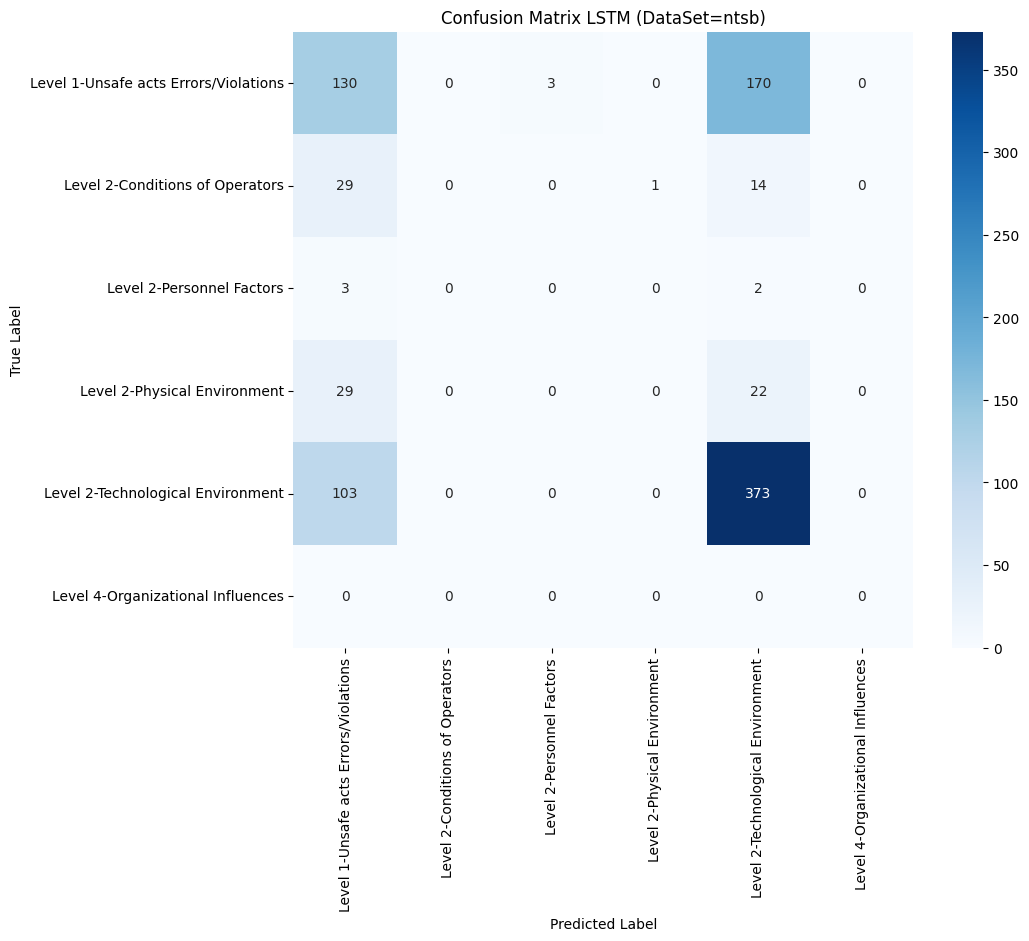

In [4]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'ntsb',
    "ls_version": ls_version
}

# 04. Train Model
lstm_ls_ntsb_Model = LSTMModel(dfs, ds_name='ntsb', options=options)
lstm_ls_ntsb_Model.train()

# 03. Evaluate Model
ntsb_evaluate_result = lstm_ls_ntsb_Model.evaluate()

## NTSB + LS(Hybrid)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


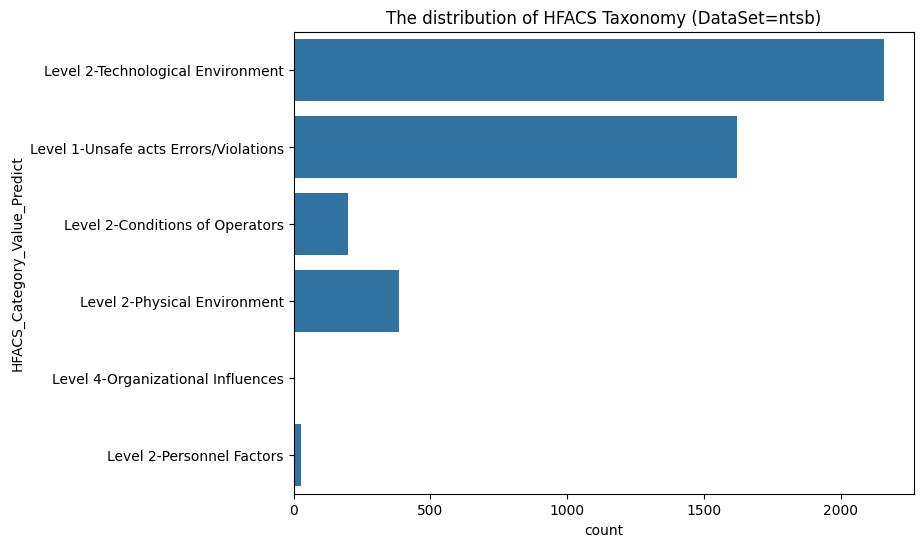

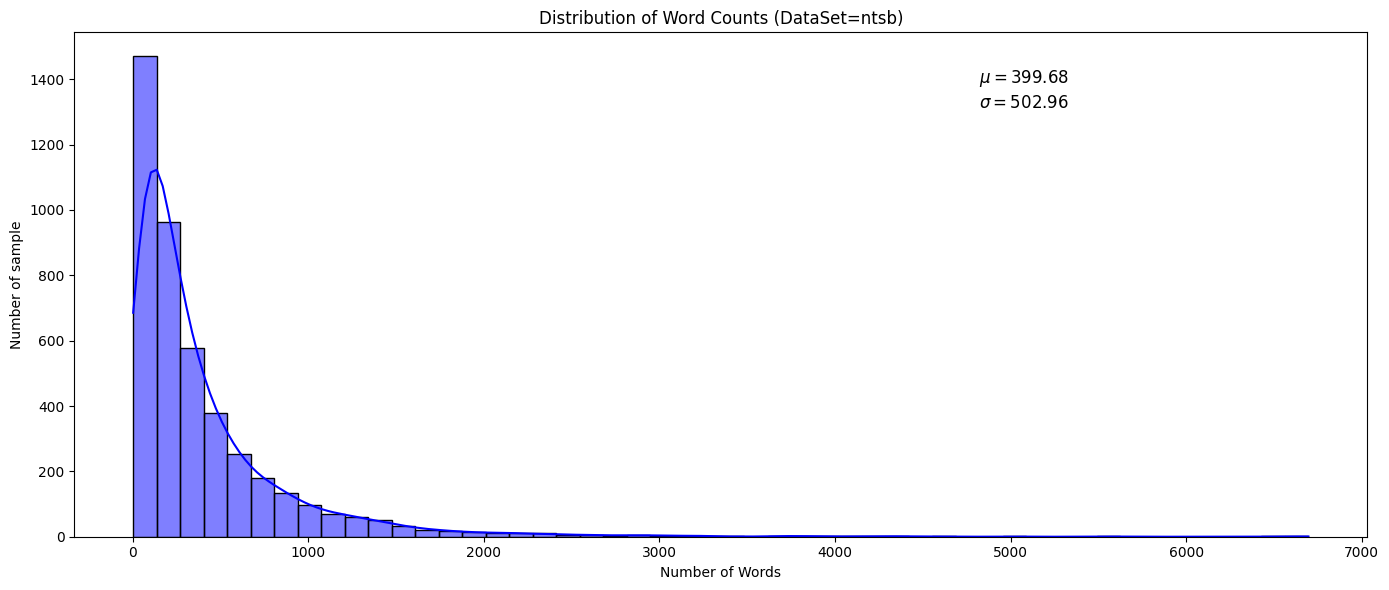

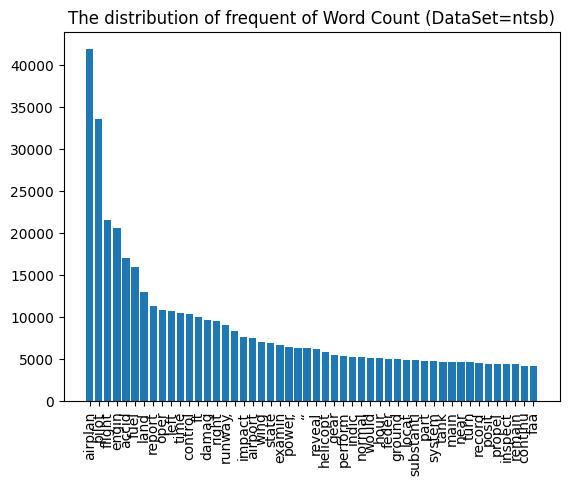

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
4    452
0    303
3     75
1     44
2      5
Name: count, dtype: int64
4    1707
0    1319
3     310
1     154
2      23
5       3
Name: count, dtype: int64
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 203ms/step - accuracy: 0.4219 - loss: 1.7556 - val_accuracy: 0.4858 - val_loss: 1.2180
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.4977 - loss: 1.1841 - val_accuracy: 0.4858 - val_loss: 1.0806
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.4856 - loss: 1.1024 - val_accuracy: 0.4858 - val_loss: 1.0840
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.4859 - loss: 1.1231 - val_accuracy: 0.4858 - val_loss: 1.0678
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.5029 - loss: 1.1035 - val_accuracy: 0.5227 - val_loss: 1.0360
Epoch 6/10
99/99 ━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_class

138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step


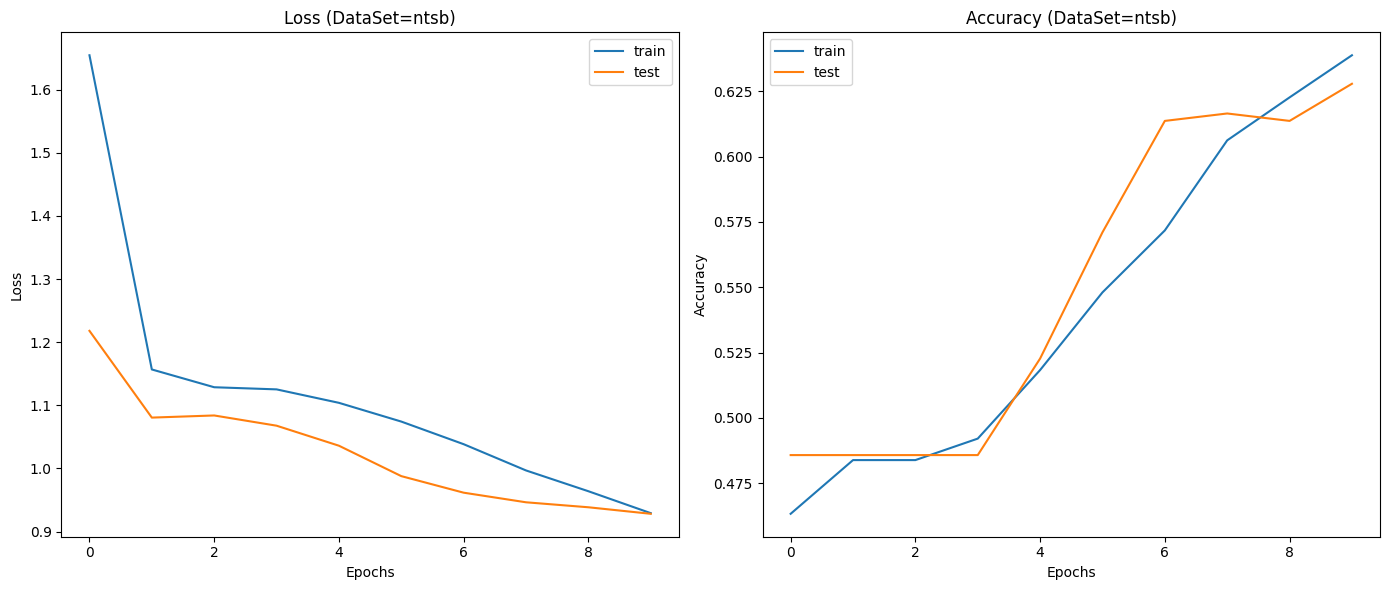

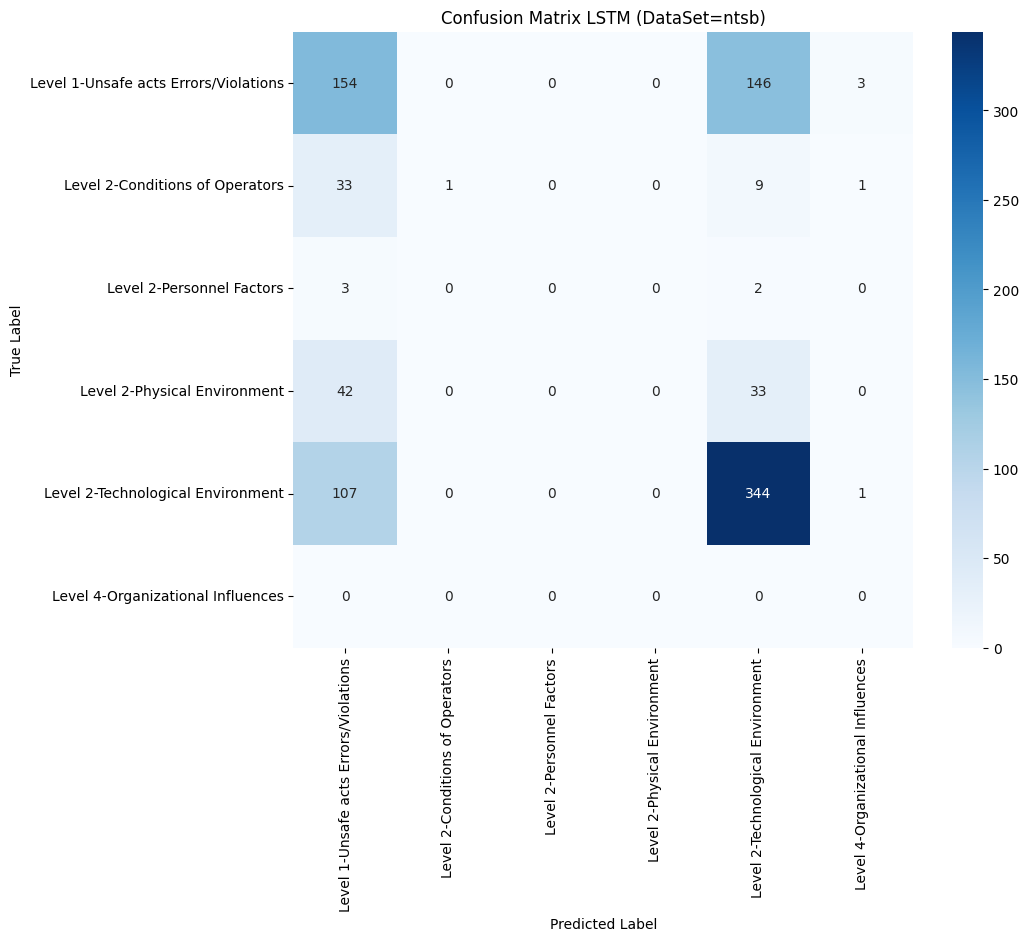

In [5]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'asrs_ntsb',
    "ls_version": ls_version
}

# 04. Train Model
lstm_ls_hybrid_Model = LSTMModel(dfs, ds_name='ntsb', options=options)
lstm_ls_hybrid_Model.train()

# 03. Evaluate Model
ntsb_evaluate_result = lstm_ls_hybrid_Model.evaluate()

## Summary of Accuracy

In [7]:
# Show Accuracy
print('ASRS=========')
show_accuracy(lstm_ls_asrs_Model)
print('NTSB=========')
show_accuracy(lstm_ls_ntsb_Model)
print('ASRS_NTSB=========')
show_accuracy(lstm_ls_hybrid_Model)

ASRS=========
Accuracy: 60.07
Macro F1 Score: 16.25
Micro F1 Score: 60.07
Weighted F1 Score: 51.02
Hamming Loss: 0.3993
NTSB=========
Accuracy: 57.22
Macro F1 Score: 22.83
Micro F1 Score: 57.22
Weighted F1 Score: 53.23
Hamming Loss: 0.4278
ASRS_NTSB=========
Accuracy: 56.77
Macro F1 Score: 20.37
Micro F1 Score: 56.77
Weighted F1 Score: 52.64
Hamming Loss: 0.4323
